In [12]:
import json

# read jsonl file
path = "/mnt/ssd/Projects/lmms-eval/outputs/hrbench_glm45v_think/eval_results.jsonl"
with open(path, "r") as f:
    data = [json.loads(line) for line in f]

print(data[:5])  # print first 5 entries

[{'doc_id': 0, 'target': 'A', 'filtered_resps': ['<|begin_of_box|>I need to examine the image to identify the number displayed above the entrance where the woman is standing. Looking at the image, I can see a woman standing in front of an entrance with a staircase behind her. Above this entrance, there is a small rectangular sign with a number on it. The number clearly displayed on the sign is "27B". Comparing this with the given options, the correct answer is A. 27B.<|end_of_box|>\nThe number displayed above the entrance where the woman is standing is 27B, therefore, the answer is <|begin_of_box|>A. 27B<|end_of_box|>.'], 'doc_hash': 'N/A', 'single': {'index': 0, 'cycle_category': '0', 'gpt_score': 1}, 'average': {'index': 0, 'cycle_category': '0', 'gpt_score': 1}, 'input': 'What is the number displayed above the entrance where the woman is standing?\nA. 27B\nB. 37B\nC. 27D\nD. 27E\n'}, {'doc_id': 1, 'target': 'B', 'filtered_resps': ['<|begin_of_box|>Looking at the image, I can see a w

In [13]:
# Reorganize the data entries
reorganized_data = {0: [], 1: []}
for e in data:
    score = e["average"]["gpt_score"]
    reorganized_data[score].append(
        {
            "question": e["input"],
            "target": e["target"],
            "response": e["filtered_resps"][0],
        }
    )

print(reorganized_data[0][0])  # print first entry of score 0

{'question': 'Where is the person standing in relation to the recycle bin?\nA. In front of the recycle bin\nB. Behind the recycle bin\nC. To the right of the recycle bin\nD. To the left of the recycle bin\n', 'target': 'A', 'response': '<|begin_of_box|>To determine the person’s position relative to the recycle bin, analyze the image:  \n- The recycle bin is a brown structure with “RECYCLE” visible.  \n- The person in the background is standing such that the recycle bin is in front of them (i.e., the bin is between the person and the camera’s perspective).  \n\nThus, the person is behind the recycle bin.  \n\nAnswer: B. Behind the recycle bin<|end_of_box|>'}


In [14]:
print(len(reorganized_data[0]), len(reorganized_data[1]))  # print lengths of both lists

211 589


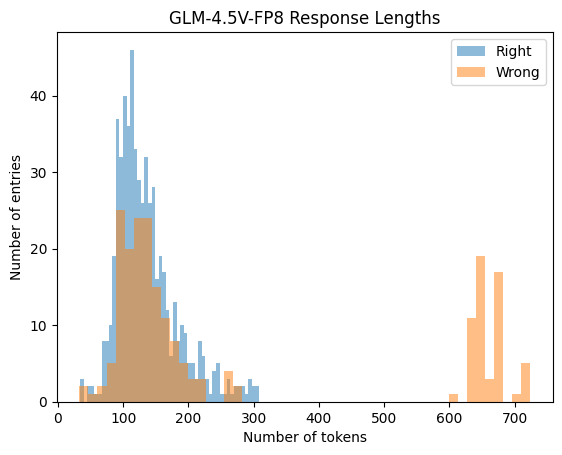

In [16]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("zai-org/GLM-4.5V-FP8")
# draw histogram of lengths
import matplotlib.pyplot as plt

lengths_0 = []
lengths_1 = []
for score in [0, 1]:
    for entry in reorganized_data[score]:
        input_text = entry["question"] + " " + entry["response"]
        tokens = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=8192)
        if score == 0:
            lengths_0.append(tokens.input_ids.shape[1])
        else:
            lengths_1.append(tokens.input_ids.shape[1])

plt.hist(lengths_1, bins=50, alpha=0.5, label="Right")
plt.hist(lengths_0, bins=50, alpha=0.5, label="Wrong")
# Make y-axis break
plt.xlabel("Number of tokens")
plt.ylabel("Number of entries")
plt.legend()
plt.title("GLM-4.5V-FP8 Response Lengths")
plt.show()

In [18]:
# find the most used tokens in each score group
from collections import Counter

counter_0 = Counter()
counter_1 = Counter()
for score in [0, 1]:
    for entry in reorganized_data[score]:
        input_text = entry["question"] + " " + entry["response"]
        tokens = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=8192)
        if score == 0:
            counter_0.update(tokens.input_ids[0].tolist())
        else:
            counter_1.update(tokens.input_ids[0].tolist())

print("Most common tokens in WRONG")
for token_id, count in counter_0.most_common(20):
    print(f"Token ID: {token_id}, Count in score 0: {count}, Token: {tokenizer.decode([token_id])}")
print("\n\nMost common tokens in RIGHT")
for token_id, count in counter_1.most_common(20):
    print(f"Token ID: {token_id}, Count in score 1: {count}, Token: {tokenizer.decode([token_id])}")

Most common tokens in WRONG
Token ID: 279, Count in score 0: 4279, Token:  the
Token ID: 11, Count in score 0: 3310, Token: ,
Token ID: 13, Count in score 0: 3234, Token: .
Token ID: 220, Count in score 0: 2743, Token:  
Token ID: 374, Count in score 0: 1419, Token:  is
Token ID: 198, Count in score 0: 1094, Token: 

Token ID: 311, Count in score 0: 837, Token:  to
Token ID: 5739, Count in score 0: 813, Token:  Item
Token ID: 323, Count in score 0: 763, Token:  and
Token ID: 315, Count in score 0: 761, Token:  of
Token ID: 13815, Count in score 0: 723, Token:  Wait
Token ID: 264, Count in score 0: 681, Token:  a
Token ID: 358, Count in score 0: 655, Token:  I
Token ID: 304, Count in score 0: 636, Token:  in
Token ID: 2168, Count in score 0: 587, Token:  image
Token ID: 25, Count in score 0: 581, Token: :
Token ID: 594, Count in score 0: 530, Token: 's
Token ID: 16, Count in score 0: 513, Token: 1
Token ID: 7196, Count in score 0: 473, Token:  maybe
Token ID: 525, Count in score 0: 456,